In [2]:
import pandas as pd
import numpy as np
import os
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units
from functions.fun_sdk import *

os.environ['TZ'] = 'UTC'

In [5]:
# Get NWP model data for the tracks
# Complete time scale
# Surface parameters
nwp = 'ERA5T'
sed = ['2021-06-01','2021-06-02','2021-06-04','2021-06-05','2021-06-08','2021-06-18','2021-06-21','2021-06-22','2021-07-13','2021-07-25','2021-07-26']

cellsmeteo = pd.DataFrame() # Dataframe for meteo of single cell

for i in np.arange(0,len(sed),1):
    doi = sed[i]
    y_oi = doi.split('-')[0]
    m_oi = doi.split('-')[1]
    d_oi = doi.split('-')[2]

    fs = glob.glob("/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tracks/data/"+y_oi+"/"+m_oi+"/"+d_oi+"/Track_*")

    for j in np.arange(0,len(fs),1):
        cdata = pd.read_csv(fs[j])

        meteo = pd.DataFrame()
        for k in np.arange(0,len(cdata),1):
            start = cdata.timestr[k].split()[0]
            end = cdata.timestr[k].split()[0]

            time = pd.Timestamp(cdata.timestr[k]).round('1 H')

            cois = [[cdata.longitude[k],cdata.latitude[k]]]

            nwpdata = get_surface_model_output(cois, start, end, nwp, apikey='nRMiXJ34HBIwOjlq')

            nwpdata = nwpdata[nwpdata.TIMESTAMP == time]
            nwpdata = nwpdata.iloc[:,3:8]

            meteo = pd.concat([meteo, nwpdata],axis = 0)
            meteo = meteo.reset_index(drop = True)
        meteo = pd.concat([cdata[['timestr','cell']],meteo], axis = 1)
        cellsmeteo = pd.concat([cellsmeteo,meteo],axis=0)

In [2]:
# Get NWP model data for the tracks
# Complete time scale
# Surface parameters
nwp = 'ERA5T'
sed = ['2021-06-01','2021-06-02','2021-06-04','2021-06-05','2021-06-08','2021-06-18','2021-06-21','2021-06-22','2021-07-13','2021-07-25','2021-07-26']

cellsmeteo = pd.DataFrame() # Dataframe for meteo of single cell

i = 0

doi = sed[i]
y_oi = doi.split('-')[0]
m_oi = doi.split('-')[1]
d_oi = doi.split('-')[2]

fs = glob.glob("/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/tracks/data/"+y_oi+"/"+m_oi+"/"+d_oi+"/Track_*")

j = 0

cdata = pd.read_csv(fs[j])

meteo = pd.DataFrame()

k = 0

start = cdata.timestr[k].split()[0]
end = cdata.timestr[k].split()[0]

time = pd.Timestamp(cdata.timestr[k]).round('1 H')

cois = [[cdata.longitude[k],cdata.latitude[k]]]

In [3]:
nwpdata = get_sounding_model_output(cois, start, end, nwp, apikey='nRMiXJ34HBIwOjlq')
#nwpdata = nwpdata[nwpdata.TIMESTAMP == time]

In [36]:
p = np.array([1000,900,850,800,700,500,250]) * units.hPa
T = nwpdata.iloc[:,4:11].values.flatten() * units.degC
# Td = nwpdata['dewpoint'].values * units.degC
wind_speed = nwpdata.iloc[:,12:19].values.flatten()*0.53 * units.knots
wind_dir = nwpdata.iloc[:,20:28].values.flatten() * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

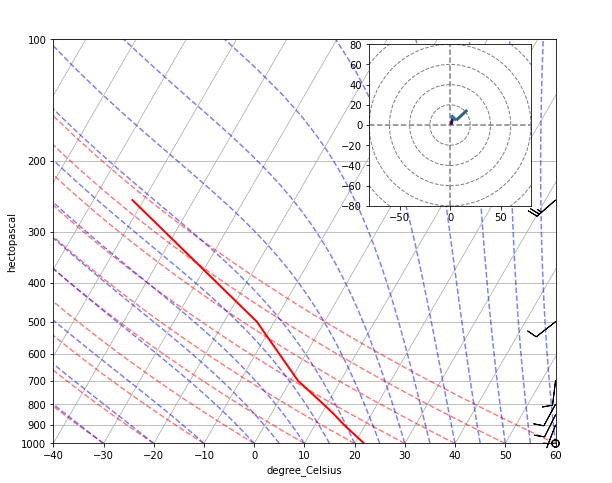

In [47]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)


# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r', linewidth=2)
#skew.plot(p, Td, 'g', linewidth=2)
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
#skew.plot_mixing_lines()

In [168]:
# read active locations with radiosoundings
locations = pd.read_csv("/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/radiosounding/pkt_aero_Beschreibung_Stationen.csv", sep = ';')
locations = locations[locations.bis_datum == 20220331]
locations = locations.reset_index(drop=True)
locations

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
0,125,19811001,20220331,742,47.8342,10.8667,Altenstadt,Bayern
1,368,19800102,20220331,69,52.8152,9.9248,Bergen,Niedersachsen
2,1303,19740101,20220331,150,51.4041,6.9677,Essen-Bredeney,Nordrhein-Westfalen
3,1757,19610101,20220331,2,54.0967,13.4056,Greifswald,Mecklenburg-Vorpommern
4,2385,19800102,20220331,376,49.6927,7.3263,Idar-Oberstein,Rheinland-Pfalz
5,2773,19800102,20220331,415,49.4283,11.9016,Kuemmersbruck,Bayern
6,3015,19610101,20220331,98,52.2085,14.1180,Lindenberg,Brandenburg
7,3231,19690101,20220331,450,50.5611,10.3771,Meiningen,Thueringen
8,3254,19800102,20220331,19,52.7155,7.3176,Meppen,Niedersachsen
9,3631,20110615,20220331,12,53.7123,7.1519,Norderney,Niedersachsen


/var/folders/vt/qcqw99t14c1cpnsq3tk4ynm40000gq/T/ipykernel_52010/3114245051.py:59: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparency" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/radiosounding/'+locations.Stationsname[locations.Stations_id == i].values[0]+'_'+y_oi+m_oi+d_oi+k+'.png', dpi = 400, facecolor = 'white', transparency = False)


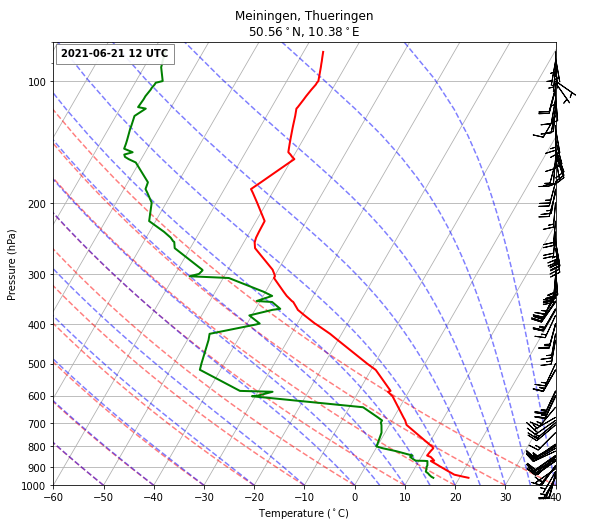

In [171]:
stationID = 3231
sed = '2021-06-21' # ['2021-06-04','2021-06-05','2021-06-08','2021-06-21','2021-06-22','2021-07-13','2021-07-25','2021-07-26']
time = '12' # ['00','06','12','18']

i = stationID
# Read measured radiosounding data from DWD open data server
if i == 125:
    url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/radiosondes/low_resolution/historical/2021/punktwerte_aero_00125_20210101_20211223_hist.zip"
elif i == 368:
    url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/radiosondes/low_resolution/historical/2021/punktwerte_aero_00368_20210101_20211219_hist.zip"
elif i == 2290:
    url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/radiosondes/low_resolution/historical/2021/punktwerte_aero_02290_20210101_20211229_hist.zip"
elif i == 3254:
    url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/radiosondes/low_resolution/historical/2021/punktwerte_aero_03254_20210101_20211222_hist.zip"
else:
    url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/radiosondes/low_resolution/historical/2021/punktwerte_aero_0"+str(i)+"_20210101_20211231_hist.zip"
radio_raw = pd.read_table(url, sep = ";")

doi = sed
y_oi = doi.split('-')[0]
m_oi = doi.split('-')[1]
d_oi = doi.split('-')[2]

k = time
radio_raw = radio_raw.loc[radio_raw.MESS_DATUM == int(y_oi+m_oi+d_oi+k)]

if len(radio_raw) > 0:
    radio_raw = radio_raw.reset_index(drop = True)
    radio_raw = radio_raw.loc[1:len(radio_raw)]
    radio_raw = radio_raw[radio_raw.AEP > 80]

    p = radio_raw.AEP.values * units.hPa
    T = radio_raw.AET.values * units.degC
    Td = radio_raw.AETD.values * units.degC
    wind_speed = radio_raw.AEFF.values * units.knots
    wind_dir = radio_raw.AEDD.values * units.degrees
    u, v = mpcalc.wind_components(wind_speed, wind_dir)

    # Create a new figure. The dimensions here give a good aspect ratio
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig)

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    skew.plot(p, T, 'r', linewidth=2)
    skew.plot(p, Td, 'g', linewidth=2)
    skew.plot_barbs(p, u, v)
    skew.ax.set_ylim(1000, 80)
    skew.ax.set_xlim(-60, 40)
    skew.ax.set_xlabel('Temperature ($^\circ$C)')
    skew.ax.set_ylabel('Pressure (hPa)')
    skew.ax.set_title(locations.Stationsname[locations.Stations_id == i].values[0]+", "+locations[' Bundesland'][locations.Stations_id == i].values[0]+"\n"+str(locations['geoBreite'][locations.Stations_id == i].values[0].round(2))+"$^\circ$N, "+str(locations['geoLaenge'][locations.Stations_id == i].values[0].round(2))+"$^\circ$E")
    skew.ax.text(-97,87, doi+" "+k+' UTC', ha = 'center', fontweight = 'bold', fontsize=10,bbox=dict(facecolor='white', edgecolor='grey', pad=5.0, alpha = 0.9))

    # Add the relevant special lines
    skew.plot_dry_adiabats()
    skew.plot_moist_adiabats()
    # skew.plot_mixing_lines()
    plt.savefig('/Users/nicobader/Documents/Uni_Leipzig/master_thesis/analysis/radiosounding/'+locations.Stationsname[locations.Stations_id == i].values[0]+'_'+y_oi+m_oi+d_oi+k+'.png', dpi = 400, facecolor = 'white', transparency = False)

else:
    print('No data available')